<table width="100%" border="0">
  <tr>    
  <td><img src="./images/ing.png" alt="" align="left" /></td>
  <td><img src="./images/ucv.png" alt="" align="center" height="100" width="100" /></td>
  <td><img src="./images/mec.png" alt="" align="right"/></td>
  </tr>
</table>

<br>

<h1 style="text-align: center;"> Curso de Python para Ingenieros Mecánicos </h1> 
<h3 style="text-align: center;"> Por: Eduardo Vieira</h3>
<br>
<br>
<h1 style="text-align: center;">  Sympy - Sistema de algebra simbólica </h1> 
<br>

__SymPy es una biblioteca de Python para matemática simbólica__. Apunta a convertirse en un sistema de algebra computacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible. SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_ Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativo y de pago. [Aquí](https://github.com/sympy/sympy/wiki/SymPy-vs.-Maple) puedes encontrar una comparativa de SymPy con Maple. _

Puede hacer cosas como:

* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...

In [1]:
import sympy as sym
%matplotlib inline

Para que los resultados sean formateados en $\LaTeX$ podemos usar:

In [2]:
sym.init_printing(use_latex=True)

## Variables simbólicas

En SymPy podemos crear símbolos para las variables con las que deseamos trabajar. Podemos crear un nuevo símbolo usando la clase `Symbol`:

In [3]:
x = sym.Symbol('x')

In [4]:
(sym.pi + x)**2

In [5]:
# forma alternativa de definir (varios) símbolos
a, b, c = sym.symbols("a, b, c")

In [6]:
type(a)

sympy.core.symbol.Symbol

Podemos agregar algunas propiedades a los símbolos cuando son creados:

In [7]:
x = sym.Symbol('x', real=True)

In [8]:
x.is_imaginary

False

In [9]:
x = sym.Symbol('x', positive=True)

In [10]:
x > 0

### Números complejos

La unidad imaginaria es denotada por `I` en Sympy. 

In [12]:
1+1*sym.I

In [13]:
sym.I**2

In [14]:
(x * sym.I + 1)**2

### Números racionales

Existen tres tipos distintos de números en SymPy: `Real`, `Rational`, `Integer`: 

In [15]:
r1 = sym.Rational(4,5)
r2 = sym.Rational(5,4)

In [16]:
r1

In [17]:
r1+r2

In [18]:
r1/r2

### Evaluación numérica

SymPy usa una librería para trabajar con números con precisión arbitraria, y tiene expresiones SymPy  predefinidas para varias constantes matemáticas, tales como: `pi`, `e` y `oo` para el infinito.

Para evaluar numéricamente una expresión podemos usar la función `evalf` (o bien `N`). Ésta usa un argumento `n` que especifíca el número de cifras significativas.

In [19]:
sym.pi.evalf(n=50)

In [20]:
y = (x + sym.pi)**2

In [22]:
sym.N(y, 5) # equivalente a evalf

Cuando evaluamos numéricamente expresiones a menudo deseamos substituir un símbolo por un valor numérico. En SymPy hacemos esto usando la función `subs`:

In [23]:
y.subs(x, 1.5)

In [25]:
sym.N(y.subs(x, 1.5))

La función `subs` también puede ser usada para substituir símbolos y expresiones:

In [26]:
y.subs(x, a+sym.pi)

También podemos combinar la evaluación numérica de expresiones con arreglos NumPy:

In [27]:
import numpy as np

In [28]:
x_vec = np.arange(0, 10, 0.1)

In [34]:
y_vec = np.array([sym.N(((x + sym.pi)**2).subs(x, xx)) for xx in x_vec])

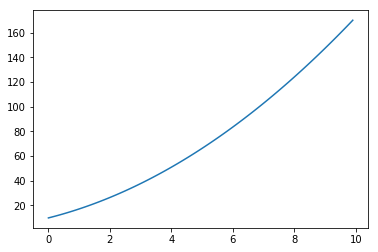

In [35]:
import matplotlib.pyplot as plt
plt.plot(x_vec, y_vec);

Sin embargo, este tipo de evaluación numérica puede ser muy lenta, y existe una forma mucho más eficiente de realizar la misma tarea: Usar la función `lambdify` para "mapear" una expresión de Sympy a una función que es mucho más eficiente para la evaluación numérica:

In [37]:
f = sym.lambdify([x], (x + sym.pi)**2, 'numpy')  # el primer argumento es una lista de variables de las que la función f dependerá: en este caso sólo x -> f(x)

In [38]:
type(f)

function

In [39]:
y_vec = f(x_vec)  # ahora podemos pasar directamente un arreglo Numpy. Así f(x) es evaluado más eficientemente

La mayor eficiencia de usar funciones "lambdificadas" en lugar de usar evalación numérica directa puede ser significativa, a menudo de varios órdenes de magnitud. Aún en este sencillo ejemplo obtenemos un aumento de velocidad importante:

In [40]:
%%timeit

y_vec = np.array([sym.N(((x + sym.pi)**2).subs(x, xx)) for xx in x_vec])

31.4 ms ± 40.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
%%timeit

y_vec = f(x_vec)

7.02 µs ± 67.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Manipulaciones algebráicas

Uno de los usos principales de un sistema de cálculo simbólico es que realiza manipulaciones algebráicas de expresiones. Por ejemplo, si queremos expandir un producto, factorizar una expresión, o simplificar un resultado. En esta sección presentamos las funciones para realizar estas operaciones básicas en SymPy.

### Expand and factor

Primeros pasos en la manipulación algebráica

In [42]:
(x+1)*(x+2)*(x+3)

In [44]:
sym.expand((x+1)*(x+2)*(x+3))

La función `expand` acepta varias argumentos clave con los que se puede indicar qué tipo de expansión deseamos realizar. Por ejemplo, para expandir expresiones trigonométricas, usamos el argumento clave `trig=True`:

In [45]:
sym.sin(a+b)

In [46]:
sym.expand(sym.sin(a+b), trig=True)

Ver `help(expand)` para una descripción detallada de los distintos tipos de expansiones que la función `expand` puede realizar.

También podemos factorizar expresiones, usando la función `factor` de SymPy: 

In [47]:
sym.factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify

La función `simplify` intenta simplificar una expresión usando distinta técnicas. Existen también alternativas más específicas a la función `simplify`: `trigsimp`, `powsimp`, `logcombine`, etc. 

El uso básico de estas funciones en el siguiente:

In [48]:
# simplify expande un producto
sym.simplify((x+1)*(x+2)*(x+3))

In [51]:
# simplify usa identidades trigonometricas
sym.simplify(sym.sin(a)**2 + sym.cos(a)**2)

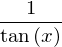

In [52]:
sym.simplify(sym.cos(x)/sym.sin(x))

## apart and together

Podemos también manipular expresiones simbólicas que involucran fracciones usando las funciones `apart` y `together`. La primera de estas funciones separa una fracción en sus correspondientes fracciones parciales; la segunda hace todo lo contrario.

In [53]:
f1 = 1/((a+1)*(a+2))

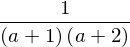

In [54]:
f1

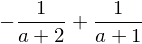

In [56]:
sym.apart(f1)

In [57]:
f2 = 1/(a+2) + 1/(a+3)

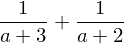

In [58]:
f2

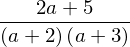

In [59]:
sym.together(f2)

Podemos usar también `Simplify`:

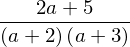

In [62]:
sym.simplify(f2)

## Cálculo

Además de realizar manipulaciones algebráicas, SimPy puede realizar operaciones de cálculo, tales como derivar y derivar expresiones.

### Derivación

Derviar es usualmente algo simple. Usamos la función `diff`. El primer argumento es una expresión que será derivada, y el segundo argumento es el símbolo respecto al cual se realizará la derivada:

In [63]:
y

In [64]:
sym.diff(y**2, x)

Para calcular derivadas de orden superior podemos usar:

In [65]:
sym.diff(y**2, x, x)

o bien

In [66]:
sym.diff(y**2, x, 2) # hace lo mismo

Calculando la derivada de una función de varias variables:

In [68]:
x, y, z = sym.symbols("x,y,z")

In [71]:
f = sym.sin(x*y) + sym.cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [72]:
sym.diff(f, x, 1, y, 2)

### Integracion

La integración se realiza de la misma forma:

In [73]:
f

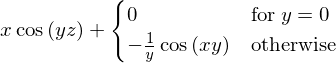

In [74]:
sym.integrate(f, x)

Si le damos los límites de integración calculamos la integral definida

In [75]:
sym.integrate(f, (x, -1, 1))

Tambien podemos calcular integrales impropias

In [78]:
from sympy import oo
# oo es el infinito

In [79]:
sym.integrate(sym.exp(-x**2), (x, -oo, oo))

### Sumatoria y productos

Podemos evaluar sumatorias usando: 'Sum'

In [81]:
n = sym.Symbol("n")

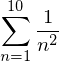

In [83]:
sym.Sum(1/n**2, (n, 1, 10))

In [84]:
sym.Sum(1/n**2, (n,1, 10)).evalf()

In [85]:
sym.Sum(1/n**2, (n, 1, oo)).evalf()

Lo mismo con productos

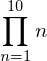

In [86]:
sym.Product(n, (n, 1, 10)) # 10!

### Límites

Los límites se evalúan con la función `limit`

In [87]:
sym.limit(sym.sin(x)/x, x, 0)

Se puede usar el límite para verificar una derivada

In [90]:
f

In [91]:
sym.diff(f, x)

La derivada por definicion es 
$$\frac{d}{{dx}}f\left( x \right) = \mathop {\lim }\limits_{h \to 0} \frac{{f\left( {x + h } \right) - f\left( x \right)}}{h }$$

In [93]:
h = sym.Symbol("h")

In [94]:
sym.limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

Podemos calcular los limites laterales usando el argumento `dir`:

In [96]:
sym.limit(1/x, x, 0, dir="+")

In [97]:
sym.limit(1/x, x, 0, dir="-")

### Series

Las series tambien son una de las funciones mas útiles de un CAS. En SymPy se puede calcular la serie de una funcion usando `series`

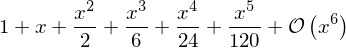

In [99]:
sym.series(sym.exp(x), x)

Por defecto, se calcula la expansión alrededor de $x=0$ (serie de Taylor), pero podemos expandir la serie al rededor de otro punto

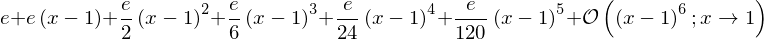

In [100]:
sym.series(sym.exp(x), x, 1)

Tambien podemos especificar el orden

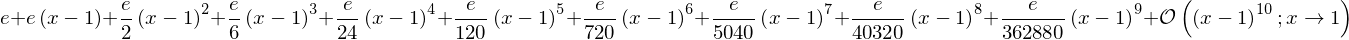

In [101]:
sym.series(sym.exp(x), x, 1, 10)

La expansion en serie incluye la aproximación de orden. Lo cual es útil para trabajar con series de diferente orden

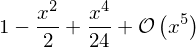

In [102]:
s1 = sym.cos(x).series(x, 0, 5)
s1

In [103]:
s2 = sym.sin(x).series(x, 0, 2)
s2

In [104]:
sym.expand(s1 * s2)

Si queremos eliminar la aproximación de orden usamos el método `removeO`

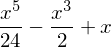

In [105]:
sym.expand(s1.removeO() * s2.removeO())

Pero hay que tener en cuenta que esta no es la expansión correcta de $\cos(x)\sin(x)$ al $5$to orden:

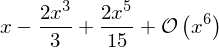

In [107]:
(sym.cos(x)*sym.sin(x)).series(x, 0, 6)

## Álgebra Lineal

### Matrices

Las matrices se definen usando la clase `Matrix`:

In [108]:
m11, m12, m21, m22 = sym.symbols("m11, m12, m21, m22")
b1, b2 = sym.symbols("b1, b2")

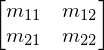

In [109]:
A = sym.Matrix([[m11, m12],[m21, m22]])
A

In [110]:
b = sym.Matrix([[b1], [b2]])
b

Con la clase `Matrix` podemos realizar las operaciones matriciales típicas

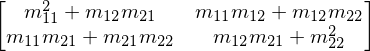

In [111]:
A**2

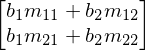

In [112]:
A * b

Y tambien determinantes e inversas:

In [113]:
A.det()

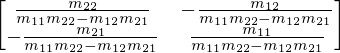

In [114]:
A.inv()

## resolviendo ecuaciones

Para resolver ecuaciones podemos utilizar la función `solve`

In [115]:
sym.solve(x**2 - 1, x)

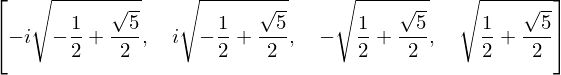

In [116]:
sym.solve(x**4 - x**2 - 1, x)

Sistemas de ecuaciones

In [117]:
sym.solve([x + y - 1, x - y - 1], [x,y])

La ecuacion puede estar en términos de otras variables simbólicas

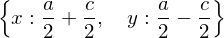

In [118]:
sym.solve([x + y - a, x - y - c], [x,y])

## Lecturas complementarias

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.


In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = './css/aeropython.css'
HTML(open(css_file, "r").read())